In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/IBM-Project/

[Errno 2] No such file or directory: '/content/drive/MyDrive/IBM-Project/'
/content


Data Collection

In [ ]:
cd /content/drive/MyDrive/IBM-Project/Project/

/content/drive/MyDrive/IBM-Project/Project


In [ ]:
!unzip FRS.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8914e04-4e33-4189-bfa9-f547e5f696d1___GCREC_Bact.Sp 3173.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a64b79-e21e-4158-9d9d-47bd6e44fba0___GCREC_Bact.Sp 3594.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8b6f17a-5189-47ae-904f-be4a09dce0ad___UF.GRC_BS_Lab Leaf 9009.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d2baf6-87de-43e5-bd40-48dfe33841d3___GCREC_Bact.Sp 5747.JPG  
  inflating: Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Tomato___Bacterial_spot/d8d3c759-4242-42c0-9be5-b3177f2664be___GCREC_Bact.Sp 5953.JPG  
  

Image Augmentation

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1)

In [70]:
pwd


'/content'

In [71]:
ls


drive/  sample_data/  veg.h5


In [72]:
cd /content/drive/MyDrive/IBM-Project/Project/dataset/fruit-dataset/fruit-dataset/train

/content/drive/MyDrive/IBM-Project/Project/dataset/fruit-dataset/fruit-dataset/train


In [73]:
ls

 Apple___Black_rot/                      fruit.h5
 Apple___healthy/                        Peach___Bacterial_spot/
'Corn_(maize)___healthy'/                Peach___healthy/
'Corn_(maize)___Northern_Leaf_Blight'/   veg.h5


In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBM-Project/Project/dataset/fruit-dataset/fruit-dataset/train',target_size=(128,128),class_mode='categorical',batch_size=32)

Found 5384 images belonging to 6 classes.


In [ ]:
x_test=train_datagen.flow_from_directory('/content/drive/MyDrive/IBM-Project/Project/dataset/fruit-dataset/fruit-dataset/test',target_size=(128,128),class_mode='categorical',batch_size=32)

Found 1686 images belonging to 6 classes.


In [ ]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

ADD Dense Layers

In [ ]:
model.add(Dense(units = 40, activation='relu', kernel_initializer = 'uniform'))
model.add(Dense(units=20, activation='relu', kernel_initializer = 'random_uniform'))
model.add(Dense(units=6, activation='softmax', kernel_initializer = 'random_uniform'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit_generator(x_train,steps_per_epoch=168,validation_data=x_test,validation_steps=52,epochs=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/3
168/168 [==============================] - 3187s 19s/step - loss: 0.8546 - accuracy: 0.6811 - val_loss: 0.4016 - val_accuracy: 0.8564
Epoch 2/3
168/168 [==============================] - 73s 432ms/step - loss: 0.4033 - accuracy: 0.8599 - val_loss: 0.3343 - val_accuracy: 0.8990
Epoch 3/3
168/168 [==============================] - 73s 435ms/step - loss: 0.3187 - accuracy: 0.8870 - val_loss: 0.2575 - val_accuracy: 0.9026


In [ ]:
model.save('fruit.h5')

Test the Model

In [74]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [75]:
model=load_model('fruit.h5')

In [76]:
img=image.load_img("/content/drive/MyDrive/IBM-Project/Project/dataset/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/09e1e0ed-2535-496e-885d-a51999b51820___Rut._Bact.S 0988.JPG")

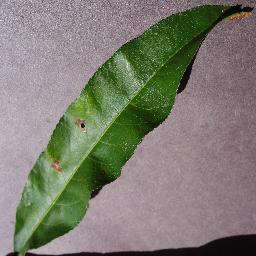

In [77]:
img

In [78]:
img=image.load_img("/content/drive/MyDrive/IBM-Project/Project/dataset/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/09e1e0ed-2535-496e-885d-a51999b51820___Rut._Bact.S 0988.JPG", target_size=(128,128))

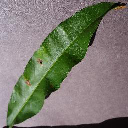

In [79]:
img

In [80]:
x=image.img_to_array(img)

In [82]:
x.shape

(128, 128, 3)

In [83]:
x=np.expand_dims(x,axis=0)

In [84]:
x.shape

(1, 128, 128, 3)

In [85]:
y=np.argmax(model.predict(x),axis=1)

In [86]:
y

array([4])

In [88]:
index = ['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Peach___Bacterial_spot', 'Peach___healthy']

In [89]:
index[y[0]]

'Peach___Bacterial_spot'

Model Building for Vegetable Disease Prediction

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1)

In [3]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBM-Project/Project/dataset/Veg-dataset/Veg-dataset/train_set',target_size=(128,128),class_mode='categorical',batch_size=16)

Found 11386 images belonging to 9 classes.


In [4]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/IBM-Project/Project/dataset/Veg-dataset/Veg-dataset/test_set',target_size=(128,128),class_mode='categorical',batch_size=16)

Found 3416 images belonging to 9 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten

In [6]:
model=Sequential()

In [7]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [8]:
model.add(MaxPool2D(pool_size=(2,2)))

In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(units = 300, activation='relu', kernel_initializer = 'uniform'))
model.add(Dense(units=150, activation='relu', kernel_initializer = 'uniform'))
model.add(Dense(units=75, activation='relu', kernel_initializer = 'uniform'))
model.add(Dense(units=9, activation='softmax', kernel_initializer = 'uniform'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit_generator(x_train,steps_per_epoch=89,validation_data=x_test,validation_steps=27,epochs=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
89/89 [==============================] - 435s 5s/step - loss: 2.0548 - accuracy: 0.2317 - val_loss: 213.9048 - val_accuracy: 0.2454
Epoch 2/20
89/89 [==============================] - 378s 4s/step - loss: 1.7374 - accuracy: 0.3329 - val_loss: 206.5883 - val_accuracy: 0.2755
Epoch 3/20
89/89 [==============================] - 329s 4s/step - loss: 1.4793 - accuracy: 0.4558 - val_loss: 170.0589 - val_accuracy: 0.4144
Epoch 4/20
89/89 [==============================] - 291s 3s/step - loss: 1.2850 - accuracy: 0.5400 - val_loss: 267.4398 - val_accuracy: 0.3519
Epoch 5/20
89/89 [==============================] - 246s 3s/step - loss: 1.2643 - accuracy: 0.5407 - val_loss: 274.7327 - val_accuracy: 0.3935
Epoch 6/20
89/89 [==============================] - 224s 3s/step - loss: 1.1933 - accuracy: 0.5674 - val_loss: 289.8510 - val_accuracy: 0.3542
Epoch 7/20
89/89 [==============================] - 182s 2s/step - loss: 1.0533 - accuracy: 0.6257 - val_loss: 286.1248 - val_accuracy: 0.3565

In [13]:
model.save('veg.h5')

In [14]:
ls

drive/  sample_data/  veg.h5


Test the Model

In [22]:
pwd


'/content'

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
model=load_model('veg.h5')

In [52]:
img=image.load_img("/content/drive/MyDrive/IBM-Project/Project/dataset/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ff7d08df-7fca-4a2e-a2f4-b196a19e6442___JR_B.Spot 3237.JPG")

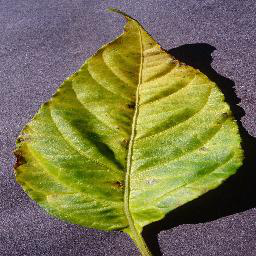

In [53]:
img

In [54]:
img=image.load_img("/content/drive/MyDrive/IBM-Project/Project/dataset/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ff7d08df-7fca-4a2e-a2f4-b196a19e6442___JR_B.Spot 3237.JPG", target_size=(128,128))

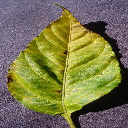

In [55]:
img

In [60]:
x=image.img_to_array(img)

In [61]:
x.shape

(128, 128, 3)

In [62]:
x=np.expand_dims(x,axis=0)

In [63]:
x.shape

(1, 128, 128, 3)

In [64]:
y=np.argmax(model.predict(x),axis=1)

In [65]:
y

array([0])

In [66]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [67]:
index=['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',  'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot',
 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']

In [68]:
index[y[0]]

'Pepper,_bell___Bacterial_spot'

In [90]:
ls

 Apple___Black_rot/                      fruit.h5
 Apple___healthy/                        Peach___Bacterial_spot/
'Corn_(maize)___healthy'/                Peach___healthy/
'Corn_(maize)___Northern_Leaf_Blight'/   veg.h5
